# EXPLORATORIO DE DATOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**ANALISIS DE LOS DATOS SOBRE RECOMENDACION DE PRODUCTO BANCARIO**

In [2]:
# Cargar los datos del archivo Excel
filepath = 'Excel_Problema-Lab-02_Entidad-bancaria_Estadistica-Aplicada-al-Marketing.xlsx'
data = pd.read_excel(filepath)

# Mostrar las primeras filas del DataFrame para entender su estructura
print(data.head())


  Persona         Area  Recomendacion  Peso
0     id1        Rural              1   0.5
1     id2       Urbana              4   1.1
2     id3  Semi-urbana              3   1.2
3     id4       Urbana              5   1.1
4     id5       Urbana              4   1.1


In [3]:
# Mostrar información básica del DataFrame
print(data.info())

# Describir el DataFrame para obtener estadísticas descriptivas básicas
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Persona        21 non-null     object 
 1   Area           21 non-null     object 
 2   Recomendacion  21 non-null     int64  
 3   Peso           21 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 804.0+ bytes
None
       Recomendacion       Peso
count      21.000000  21.000000
mean        2.476190   0.890476
std         1.631534   0.316077
min         0.000000   0.500000
25%         1.000000   0.500000
50%         3.000000   1.100000
75%         4.000000   1.100000
max         5.000000   1.200000


c:\Users\hugoc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


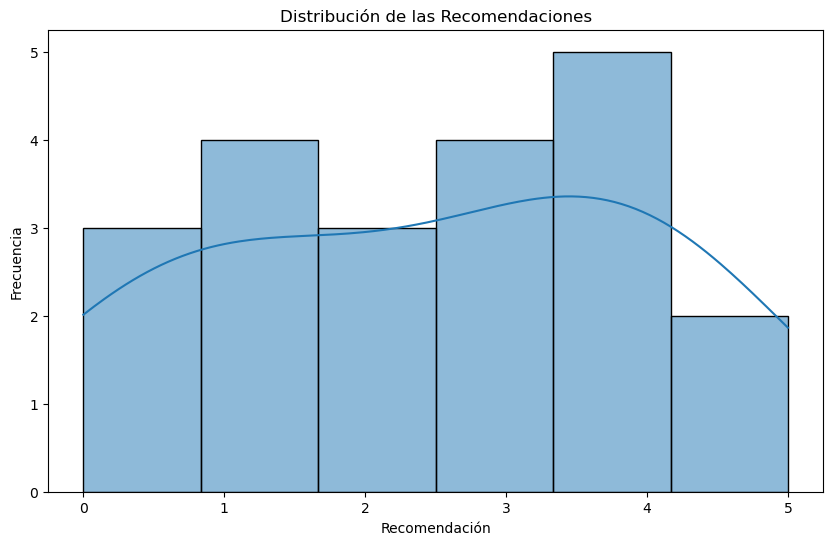

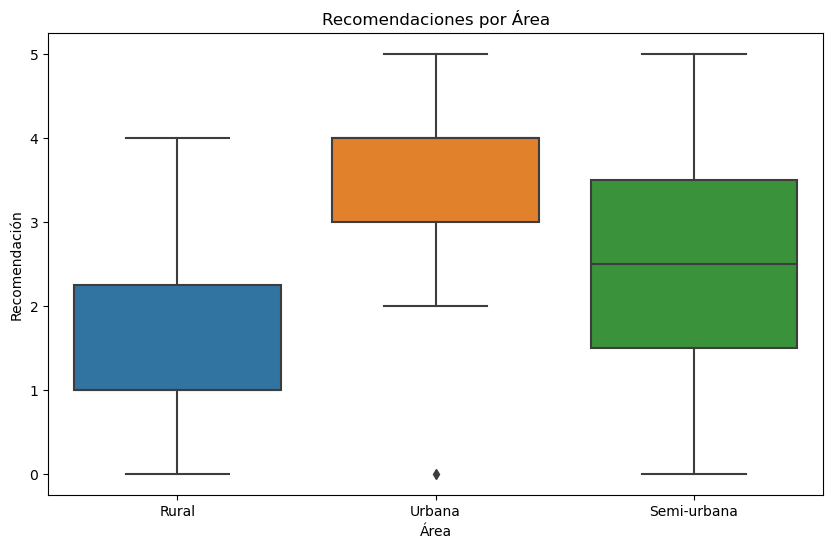

In [4]:
# Histograma de las recomendaciones
plt.figure(figsize=(10, 6))
sns.histplot(data['Recomendacion'], bins=6, kde=True)
plt.title('Distribución de las Recomendaciones')
plt.xlabel('Recomendación')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de las recomendaciones por área
plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='Recomendacion', data=data)
plt.title('Recomendaciones por Área')
plt.xlabel('Área')
plt.ylabel('Recomendación')
plt.show()

In [5]:
# Calcular media y mediana de recomendaciones por área
mean_recomendaciones = data.groupby('Area')['Recomendacion'].mean()
median_recomendaciones = data.groupby('Area')['Recomendacion'].median()

print("Media de recomendaciones por área:")
print(mean_recomendaciones)
print("\nMediana de recomendaciones por área:")
print(median_recomendaciones)

Media de recomendaciones por área:
Area
Rural          1.625000
Semi-urbana    2.500000
Urbana         3.222222
Name: Recomendacion, dtype: float64

Mediana de recomendaciones por área:
Area
Rural          1.0
Semi-urbana    2.5
Urbana         4.0
Name: Recomendacion, dtype: float64


In [6]:
# Calcular la media ponderada de las recomendaciones
weighted_mean_recomendaciones = (data['Recomendacion'] * data['Peso']).sum() / data['Peso'].sum()

print("Media ponderada de las recomendaciones:", weighted_mean_recomendaciones)

Media ponderada de las recomendaciones: 2.695187165775401


**ANALISIS DE LOS DATOS SOBRE LOS DOS MEDIOS PUBLICITARIOS**

In [8]:
tv_diario_df = pd.read_excel(filepath, sheet_name='TV diario')
datos_medios_df = pd.read_excel(filepath, sheet_name='Datos medios')

# Mostrar las primeras filas de cada DataFrame
print(tv_diario_df.head())
print(datos_medios_df.head())

       fecha  TV grps 20 segundos
0 2021-08-02                 75.0
1 2021-08-03                 76.0
2 2021-08-04                 80.0
3 2021-08-05                 85.0
4 2021-08-06                 70.0
       fecha  hipotecas  inversion_tv  RRSS_impresiones  RRSS_clicks  \
0 2021-08-02       5280      49622.28              8710          237   
1 2021-08-09       5280      51326.31             22714          664   
2 2021-08-16       5784      51326.31             28593          767   
3 2021-08-23       5728      51326.31             24632          736   
4 2021-08-30       5696      51326.31             22363          570   

   inversion_RRSS  
0         3031.63  
1         2680.76  
2         2680.76  
3         2680.76  
4         2680.76  


In [9]:
# Mostrar información básica y estadísticas descriptivas de 'TV diario'
print(tv_diario_df.info())
print(tv_diario_df.describe())

# Mostrar información básica y estadísticas descriptivas de 'Datos medios'
print(datos_medios_df.info())
print(datos_medios_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha                182 non-null    datetime64[ns]
 1   TV grps 20 segundos  182 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB
None
                     fecha  TV grps 20 segundos
count                  182           182.000000
mean   2021-10-31 12:00:00            35.032606
min    2021-08-02 00:00:00             0.000000
25%    2021-09-16 06:00:00             0.000000
50%    2021-10-31 12:00:00            40.496187
75%    2021-12-15 18:00:00            63.000000
max    2022-01-30 00:00:00           109.000000
std                    NaN            32.723867
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------     

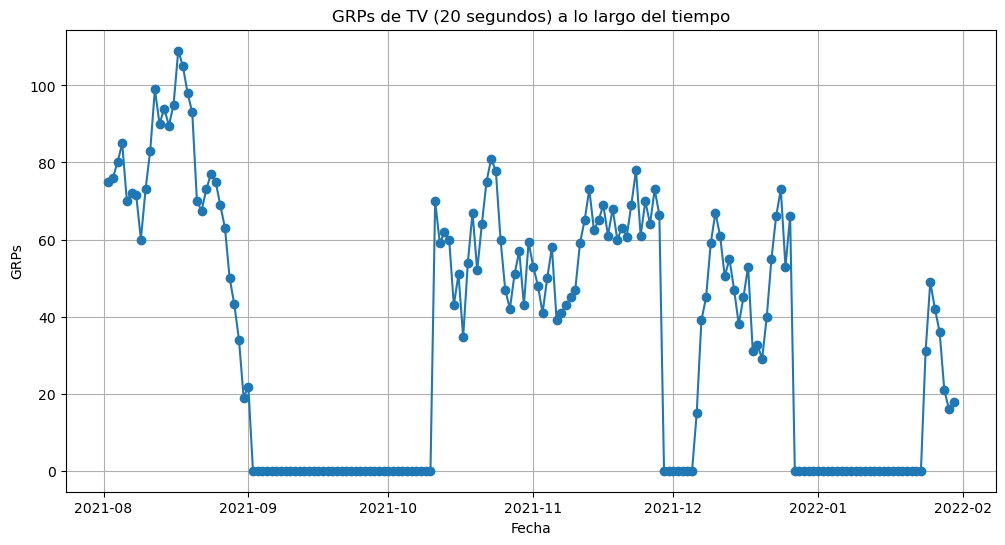

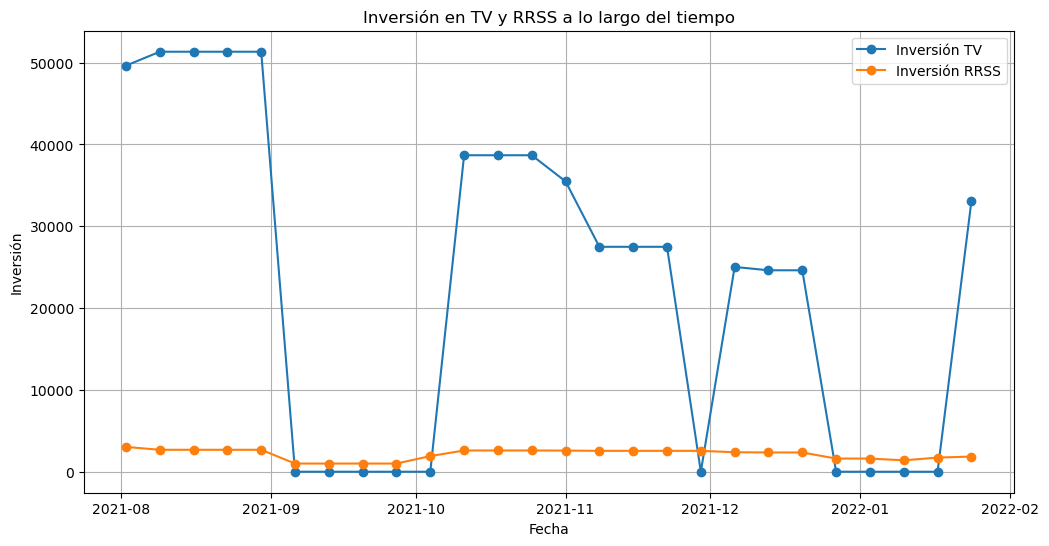

In [10]:
# Convertir la columna 'fecha' a tipo datetime
tv_diario_df['fecha'] = pd.to_datetime(tv_diario_df['fecha'])
datos_medios_df['fecha'] = pd.to_datetime(datos_medios_df['fecha'])

# Gráfico de los GRPs a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(tv_diario_df['fecha'], tv_diario_df['TV grps 20 segundos'], marker='o')
plt.title('GRPs de TV (20 segundos) a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('GRPs')
plt.grid(True)
plt.show()

# Gráfico de la inversión en TV y RRSS a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(datos_medios_df['fecha'], datos_medios_df['inversion_tv'], marker='o', label='Inversión TV')
plt.plot(datos_medios_df['fecha'], datos_medios_df['inversion_RRSS'], marker='o', label='Inversión RRSS')
plt.title('Inversión en TV y RRSS a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Inversión')
plt.legend()
plt.grid(True)
plt.show()


**Analisis de correlacion**

                        fecha  TV grps 20 segundos  hipotecas  inversion_tv  \
fecha                1.000000            -0.313280  -0.599962     -0.445908   
TV grps 20 segundos -0.313280             1.000000   0.550533      0.892264   
hipotecas           -0.599962             0.550533   1.000000      0.707278   
inversion_tv        -0.445908             0.892264   0.707278      1.000000   
RRSS_impresiones    -0.406653             0.685394   0.549071      0.691676   
RRSS_clicks         -0.831450             0.332048   0.456348      0.335927   
inversion_RRSS      -0.187369             0.801451   0.460032      0.825206   

                     RRSS_impresiones  RRSS_clicks  inversion_RRSS  
fecha                       -0.406653    -0.831450       -0.187369  
TV grps 20 segundos          0.685394     0.332048        0.801451  
hipotecas                    0.549071     0.456348        0.460032  
inversion_tv                 0.691676     0.335927        0.825206  
RRSS_impresiones      

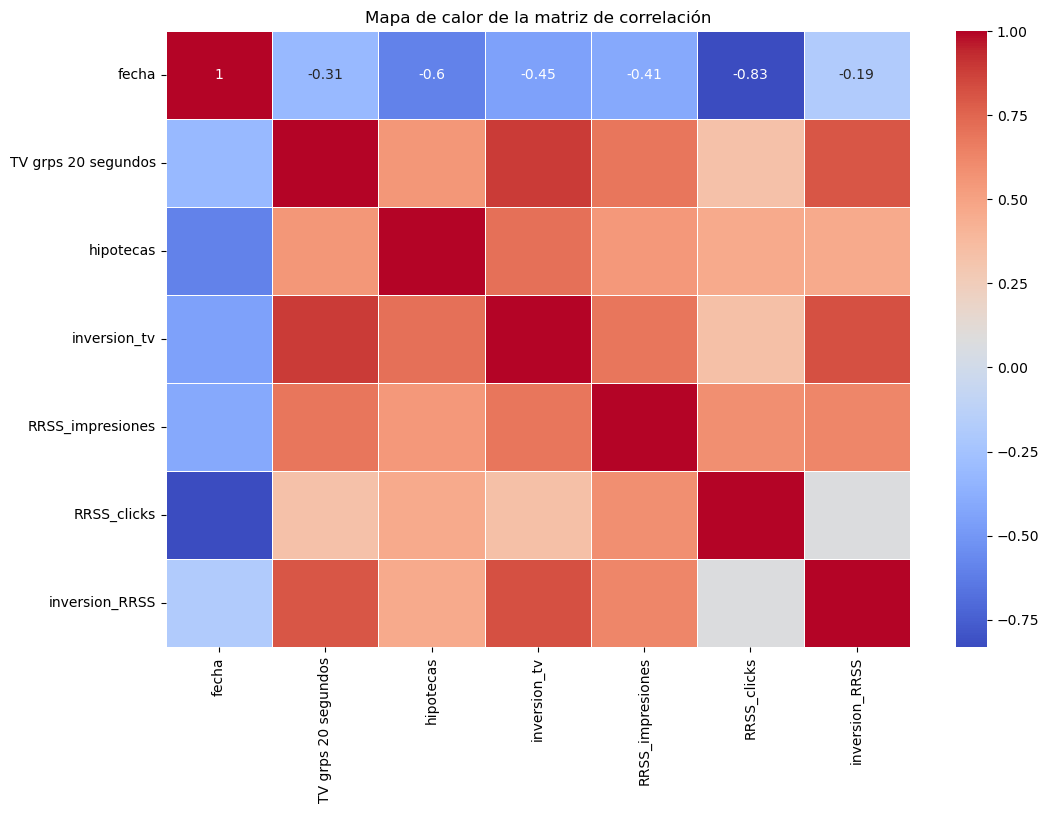

In [12]:
# Combinar las dos tablas en una sola para facilitar el análisis
combined_df = pd.merge(tv_diario_df, datos_medios_df, on='fecha', how='left')

# Calcular la matriz de correlación
correlation_matrix = combined_df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

# CONCLUSIONES

TV grps 20 segundos:

- **Hipotecas**: Correlación de 0.55. Esto indica una correlación moderada positiva, lo que sugiere que un aumento en los GRPs de TV está asociado con un aumento en la cantidad de hipotecas.
- **Inversión TV**: Correlación muy alta de 0.89. Esto es esperado ya que una mayor inversión en publicidad televisiva típicamente resulta en un mayor número de GRPs.
RRSS Impresiones: Correlación de 0.69. Esto sugiere una relación positiva moderada entre los GRPs de TV y las impresiones en redes sociales, posiblemente debido a campañas publicitarias integradas.
- **RRSS Clicks**: Correlación de 0.33. Esta correlación es baja, indicando que aunque hay alguna relación, no es muy fuerte.
- **Inversión RRSS**: Correlación de 0.80. Esto indica una correlación positiva alta, sugiriendo que las campañas en TV y RRSS pueden estar alineadas en términos de inversión.

Hipotecas:

- **Inversión TV**: Correlación alta de 0.71. Esto indica que a medida que aumenta la inversión en TV, también lo hace la cantidad de hipotecas, sugiriendo que la publicidad en TV puede tener un impacto significativo en la obtención de hipotecas.
- **RRSS Impresiones**: Correlación de 0.55. Esto sugiere una relación positiva moderada entre las impresiones en redes sociales y la cantidad de hipotecas.
- **RRSS Clicks**: Correlación de 0.46. Esto indica una correlación positiva moderada, lo que sugiere que un mayor número de clics en las redes sociales está asociado con un aumento en las hipotecas.
- **Inversión RRSS**: Correlación de 0.46. Esto sugiere que la inversión en RRSS también tiene una relación positiva con la cantidad de hipotecas, aunque no tan fuerte como la inversión en TV.


Inversión TV:

- **RRSS Impresiones**: Correlación de 0.69. Esto indica que una mayor inversión en TV también está asociada con más impresiones en RRSS, lo que puede ser parte de una estrategia publicitaria integrada.
- **RRSS Clicks**: Correlación de 0.34. Similar a los GRPs, esta relación es baja.
- **Inversión RRSS**: Correlación alta de 0.83. Esto indica que las inversiones en TV y RRSS están muy alineadas, sugiriendo una estrategia de marketing combinada.